In [1]:
#AS2019502

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv(r"C:\Users\Adithya\Desktop\Keras\Assignment\Mobile_Dataset.csv") # load csv file
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
dataset[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]]=dataset[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]]=dataset[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]].replace(0,np.NAN)

In [4]:
print(dataset.isnull().sum())

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc               474
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64


In [5]:
# Replacing null values with mean value in that category 


In [6]:
dataset.fillna(dataset.mean(),inplace=True)
print(dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [7]:
dataset.columns, dataset.shape #load columns

(Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
        'touch_screen', 'wifi', 'price_range'],
       dtype='object'),
 (2000, 21))

In [8]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0000,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,5.6481,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0000,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,5.6481,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0000,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,5.6481,1,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,5.6481,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0000,1,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0000,1,46,0.1,145,5,...,336.0,670,869,18,10.0,19,1,1,1,0


In [9]:
dataset['price_range'].value_counts() # get count for each class

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [10]:
X = dataset.drop(['price_range'], axis = 1) # get values removing categorized class column
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0000,0,7,0.6,188,2,2.0,20.0,756,2549,9,7.0,19,0,0,1
1,1021,1,0.5,1,5.6481,1,53,0.7,136,3,6.0,905.0,1988,2631,17,3.0,7,1,1,0
2,563,1,0.5,1,2.0000,1,41,0.9,145,5,6.0,1263.0,1716,2603,11,2.0,9,1,1,0
3,615,1,2.5,0,5.6481,0,10,0.8,131,6,9.0,1216.0,1786,2769,16,8.0,11,1,0,0
4,1821,1,1.2,0,13.0000,1,44,0.6,141,2,14.0,1208.0,1212,1411,8,2.0,15,1,1,0


In [11]:
y = dataset['price_range'] #get y as class column
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

array([[<AxesSubplot:title={'center':'mobile_wt'}>]], dtype=object)

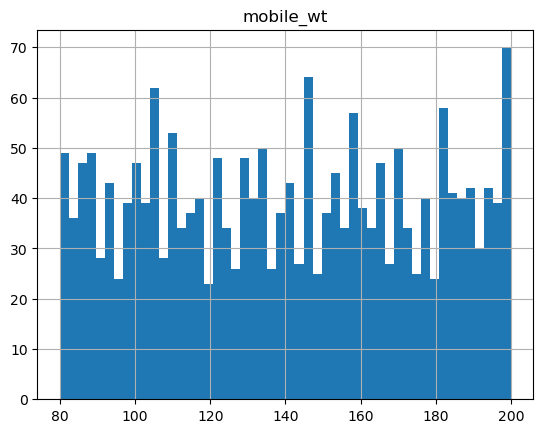

In [12]:
dataset.hist(column='mobile_wt', bins=50) #analyzing data

In [14]:
# Normalizig data # disabled


# without normalizing accuracy is high because of that, normalizing is disabled 

In [15]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 
# normalize data using standard scaler in scikit learn library 
# convert table to numpy array

In [16]:
X[0:1] # view of (normalized) data


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0,7,0.6,188,2,2.0,20.0,756,2549,9,7.0,19,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)  #split data 20% for test 
print ('Train set:', X_train.shape,  y_train.shape) # get view of amount in each test and train data
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1600, 20) (1600,)
Test set: (400, 20) (400,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier #import KNN algorithm
from sklearn import metrics # import metrics library for get errors and plot graphs for it

In [19]:
#Train Model 
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
# Get predictions and accuracy
Pred_y = model.predict(X_test) 
print("Accuracy of model at K=7 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=7 is 0.9475


In [21]:
#Get confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, Pred_y))
print(confusion_matrix(y_test, Pred_y))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.93      0.98      0.95       101
           2       0.92      0.89      0.90        87
           3       0.96      0.93      0.95       106

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

[[104   2   0   0]
 [  2  99   0   0]
 [  0   6  77   4]
 [  0   0   7  99]]


Minimum error:- 0.04 at K = 10


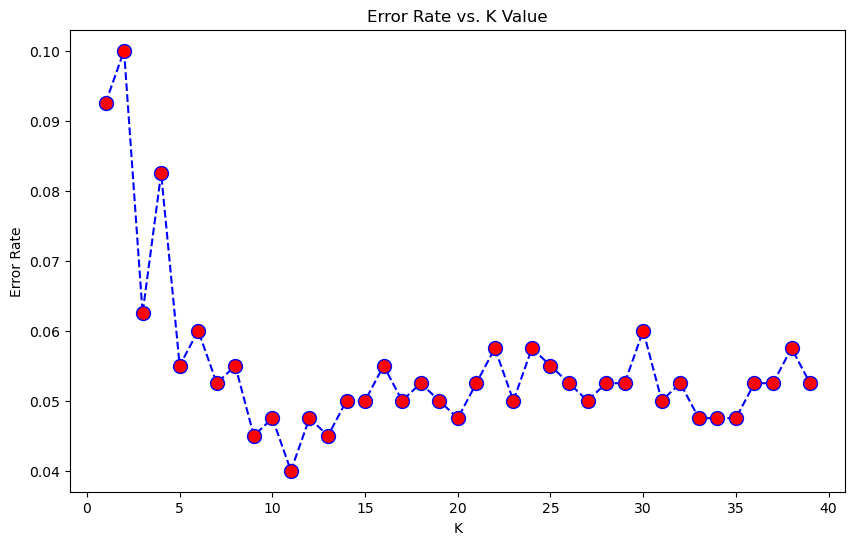

In [22]:
#plot a graph for get 'K' value with minimum error
Ks = 40
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [23]:
#Train Model1- 2
model = KNeighborsClassifier(n_neighbors = 17) # use k = 23 for avoid overfitting
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [24]:
# Get predictions and accuracy
Pred_y = model.predict(X_test) 
print("Accuracy of model at K=23 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=23 is 0.95


# without normalizing accuracy is 95% for k =23 , k =15, k =17
# with normalizing, accuracy is 55% for k = 17, 62% for k =23

Maximum accuracy:- 0.96 at K = 10


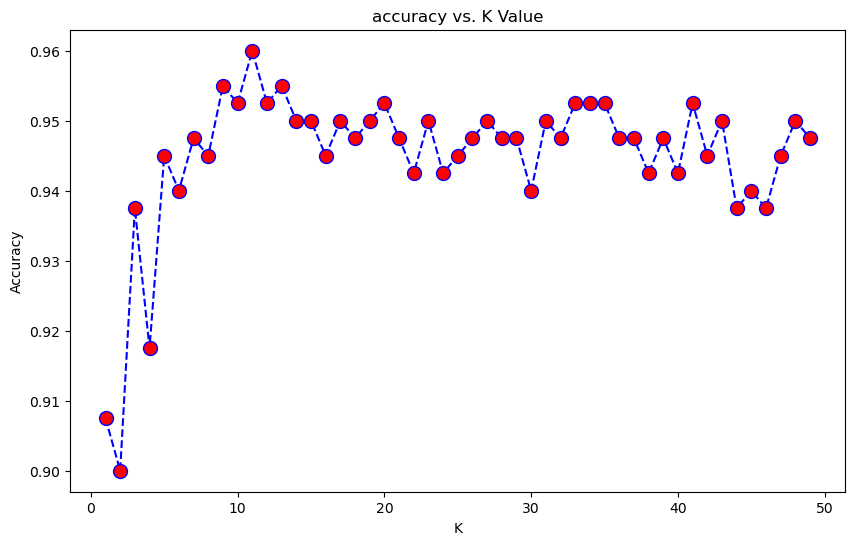

In [25]:
#Plotting accuracy
acc = []
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# .................. Question 02 using 'keras' ....................................

In [26]:
#... Load data set again
dataset2 = pd.read_csv(r"C:\Users\Adithya\Desktop\Keras\Assignment\Mobile_Dataset.csv") # load csv file
dataset2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [27]:
dataArray = dataset2.values # convert dataframe into array
dataArray

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [28]:
X = dataArray[:,0:20] # Assign first 20 columns as X
y = dataArray[:,20] # Assign last column to y

In [29]:
#Scalling using min max scalling algorithm
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [30]:
X_scale

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [31]:
y

array([1., 2., 2., ..., 3., 0., 3.])

In [35]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.2 , random_state=10) 
#split data 20% for test x_val = validate data set

print ('Train set:', X_train.shape,  y_train.shape) # get view of amount in each test and train data
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1600, 20) (1600,)
Test set: (400, 20) (400,)


In [36]:
X_val_and_test

array([[0.93453574, 1.        , 0.72      , ..., 1.        , 1.        ,
        1.        ],
       [0.87241149, 1.        , 0.96      , ..., 0.        , 1.        ,
        0.        ],
       [0.06746827, 0.        , 0.16      , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86706747, 0.        , 0.2       , ..., 1.        , 1.        ,
        0.        ],
       [0.63593854, 0.        , 0.44      , ..., 1.        , 1.        ,
        1.        ],
       [0.21776887, 1.        , 0.04      , ..., 1.        , 0.        ,
        1.        ]])

In [37]:
#split test data to validate set and test set equally
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5) 
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


In [56]:
#import codes from keras
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

In [57]:
#using 2 hidden layers with 16 neurons and output layer with 4 neurons
model = Sequential([
 Dense(16, activation="relu", input_shape=(20,)),
 Dense(16,activation='relu'),
 Dense(4,activation='softmax')
])

In [58]:
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
   metrics="accuracy")

In [60]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                336       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 676
Trainable params: 676
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=100) #train the model

Epoch 1/100
50/50 [==============================] - 1s 14ms/step - loss: 0.1272 - accuracy: 0.9563 - val_loss: 0.1500 - val_accuracy: 0.9550
Epoch 2/100
50/50 [==============================] - 1s 17ms/step - loss: 0.1229 - accuracy: 0.9675 - val_loss: 0.1760 - val_accuracy: 0.9100
Epoch 3/100
50/50 [==============================] - 1s 13ms/step - loss: 0.1212 - accuracy: 0.9631 - val_loss: 0.1539 - val_accuracy: 0.9450
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 0.1177 - accuracy: 0.9694 - val_loss: 0.1478 - val_accuracy: 0.9600
Epoch 5/100
50/50 [==============================] - 1s 18ms/step - loss: 0.1156 - accuracy: 0.9656 - val_loss: 0.1545 - val_accuracy: 0.9500
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1120 - accuracy: 0.9675 - val_loss: 0.1580 - val_accuracy: 0.9400
Epoch 7/100
50/50 [==============================] - 1s 16ms/step - loss: 0.1195 - accuracy: 0.9650 - val_loss: 0.1510 - val_accuracy: 0.9450
Epoch 8/

50/50 [==============================] - 0s 7ms/step - loss: 0.0696 - accuracy: 0.9819 - val_loss: 0.1082 - val_accuracy: 0.9650
Epoch 59/100
50/50 [==============================] - 1s 14ms/step - loss: 0.0693 - accuracy: 0.9831 - val_loss: 0.1054 - val_accuracy: 0.9800
Epoch 60/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.9819 - val_loss: 0.1132 - val_accuracy: 0.9750
Epoch 61/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0687 - accuracy: 0.9787 - val_loss: 0.1137 - val_accuracy: 0.9700
Epoch 62/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0652 - accuracy: 0.9781 - val_loss: 0.1192 - val_accuracy: 0.9650
Epoch 63/100
50/50 [==============================] - 1s 12ms/step - loss: 0.0703 - accuracy: 0.9806 - val_loss: 0.1126 - val_accuracy: 0.9800
Epoch 64/100
50/50 [==============================] - 1s 17ms/step - loss: 0.0657 - accuracy: 0.9831 - val_loss: 0.1024 - val_accuracy: 0.9750
Epoch 65/100
50

In [52]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 59ms/step - loss: 0.1320 - accuracy: 0.9450


[0.1319941282272339, 0.9449999928474426]

In [45]:
def prediction_release(preds):
    arr=[]
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [46]:
preds_test = model.predict(X_test)      
test_preds = prediction_release(preds_test)

7/7 [==============================] - 1s 44ms/step


In [47]:
#cross validation
print(classification_report(y_test,test_preds)) 

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        44
         1.0       0.96      0.94      0.95        53
         2.0       0.95      0.90      0.92        58
         3.0       0.91      0.96      0.93        45

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.95      0.94      0.94       200



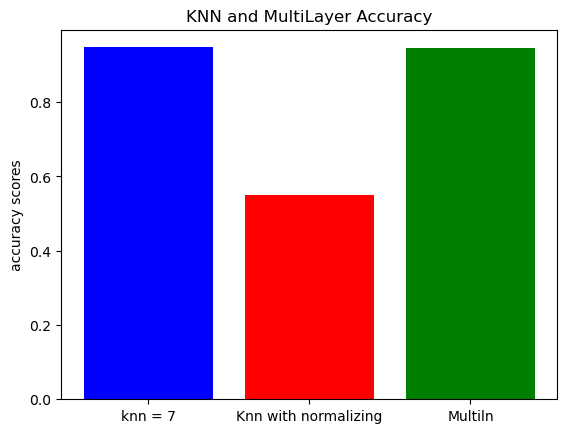

In [63]:
models = ['knn = 7' , 'Knn with normalizing','Multiln']
acc_scores = [0.9475, 0.55, 0.9450 ]

plt.bar(models, acc_scores, color=['blue','red', 'green'])
plt.ylabel("accuracy scores")
plt.title("KNN and MultiLayer Accuracy")
plt.show()